In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
features = []
target = []
path = 'C:/Users/SAI SHANKAR/Desktop/AI Major Project/dataset'
train_data_with_mask = os.listdir(path+'/with_mask')
train_data_without_mask = os.listdir(path+'/without_mask')

In [3]:
for i in train_data_with_mask:
    features.append(cv2.imread(path+'/with_mask/'+i))
    target.append(0)
for i in train_data_without_mask:
    features.append(cv2.imread(path+'/without_mask/'+i))
    target.append(1)

In [4]:
def preprocess(img):
    img = cv2.resize(img,(200,200))
    img = img/255
    return img
features = np.array(list(map(preprocess,features)))
target = np.array(target)

In [5]:
target = tf.keras.utils.to_categorical(target,num_classes = 2)
target

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [6]:
features.shape,target.shape

((1376, 200, 200, 3), (1376, 2))

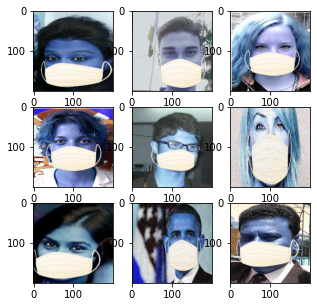

In [7]:
plt.figure(figsize=(5,5))
for i,j in enumerate(features[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(j)
plt.show()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(512,(3,3),activation='relu',input_shape=(200,200,3)),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),     
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),     
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(2,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 512)     14336     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 196, 196, 512)     2359808   
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 98, 98, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 256)       1179904   
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 94, 94, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 47, 47, 256)       0

In [9]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.2,
                                                          shear_range=0.2,
                                                          zoom_range=0.2,
                                                          horizontal_flip=True,
                                                          fill_mode='nearest',
                                                          height_shift_range=0.2,
                                                          width_shift_range=0.2)
data_gen=data_gen.flow(features,target,shuffle=True,batch_size=32)
model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(data_gen,epochs=20)

Epoch 1/20
43/43 [==============================] - 73s 1s/step - loss: 1.8798 - accuracy: 0.5220
Epoch 2/20
43/43 [==============================] - 62s 1s/step - loss: 0.6198 - accuracy: 0.6890
Epoch 3/20
43/43 [==============================] - 62s 1s/step - loss: 0.3472 - accuracy: 0.8686
Epoch 4/20
43/43 [==============================] - 62s 1s/step - loss: 0.2868 - accuracy: 0.8918
Epoch 5/20
43/43 [==============================] - 62s 1s/step - loss: 0.1814 - accuracy: 0.9363
Epoch 6/20
43/43 [==============================] - 62s 1s/step - loss: 0.1867 - accuracy: 0.9406
Epoch 7/20
43/43 [==============================] - 62s 1s/step - loss: 0.4020 - accuracy: 0.8380
Epoch 8/20
43/43 [==============================] - 62s 1s/step - loss: 0.1517 - accuracy: 0.9445
Epoch 9/20
43/43 [==============================] - 62s 1s/step - loss: 0.4614 - accuracy: 0.8055
Epoch 10/20
43/43 [==============================] - 62s 1s/step - loss: 0.3445 - accuracy: 0.7915
Epoch 11/20
43/43 [

In [10]:
model.save('my_model2.h5')

(200, 200, 3)
(1, 200, 200, 3)
[[0.9282198  0.07178023]]
With mask


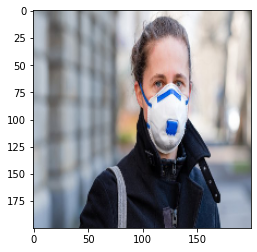

In [12]:
p = plt.imread('../input/testimages/238124-5x3-topteaser630x378.jpg')
p = preprocess(p)
plt.imshow(p)
print(p.shape)
p = np.expand_dims(p,axis=0)
print(p.shape)
p = model.predict(p)
print(p)
if p.argmax()==0:
    print('With mask')
else:
    print('Without mask')

In [3]:
my_model = tf.keras.models.load_model('C:/Users/SAI SHANKAR/Desktop/AI Major Project/my_model2.h5')


In [5]:
cap=cv2.VideoCapture(0)
cap.set(3,640)
cap.set(4,480)
cap.set(10,180)
c = 0
while c!=30:
    message,imgOriginal =cap.read()
    img = cv2.resize(imgOriginal,(200,200))
    img = np.expand_dims(img,axis=0)
    img = img/255
    cv2.putText(imgOriginal,"Class",(20,35),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    cv2.putText(imgOriginal,"Probability",(20,75),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    probabilities=my_model.predict(img)
    classIndex=my_model.predict_classes(img)
    maxprob=np.amax(probabilities)
    if classIndex==0:
        s = 'With mask'
    elif classIndex==1:
        s = 'Without mask'
    if maxprob>0.75:
        cv2.putText(imgOriginal,s,(120,35),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
        cv2.putText(imgOriginal,'{:.2}'.format(maxprob) + "%",(240,75),cv2.FONT_HERSHEY_TRIPLEX,1,(23,120,255),2)
    cv2.imshow("Result",imgOriginal)
    cv2.waitKey(1)
    c += 1
cv2.destroyAllWindows()
cap.release()